In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# Data Preprocessing
df = pd.read_csv("PremierLeague.csv")

In [20]:
# Handling missing values
df.dropna(inplace=True)

In [21]:
# Feature Engineering
# For example, creating new features based on existing ones
df['TotalGoals'] = df['FullTimeHomeTeamGoals'] + df['FullTimeAwayTeamGoals']
df['GoalDifference'] = df['FullTimeHomeTeamGoals'] - df['FullTimeAwayTeamGoals']

In [22]:
# Feature Selection
# Selecting relevant features for training the model
features = ['HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget',
            'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
            'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamReadCards',
            'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'TotalGoals', 'GoalDifference']

In [23]:
X = df[features]
y = df['FullTimeHomeTeamGoals']  # Target variable

In [24]:
# Model Selection
# Choosing a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Training the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Evaluating the model
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.005352631578947368
Mean Absolute Error (MAE): 0.009224376731301937
R-squared (R2): 0.9965546793041795


In [30]:
# Saving predictions, original data, and evaluation metrics to a new CSV file
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [31]:
results.to_csv("Prediction_Results.csv", index=False)
print("Prediction results saved to Prediction_Results.csv")

Prediction results saved to Prediction_Results.csv


In [32]:
import matplotlib.pyplot as plt

/home/victoralvin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [33]:
# Load prediction results from the saved CSV file
results = pd.read_csv("Prediction_Results.csv")

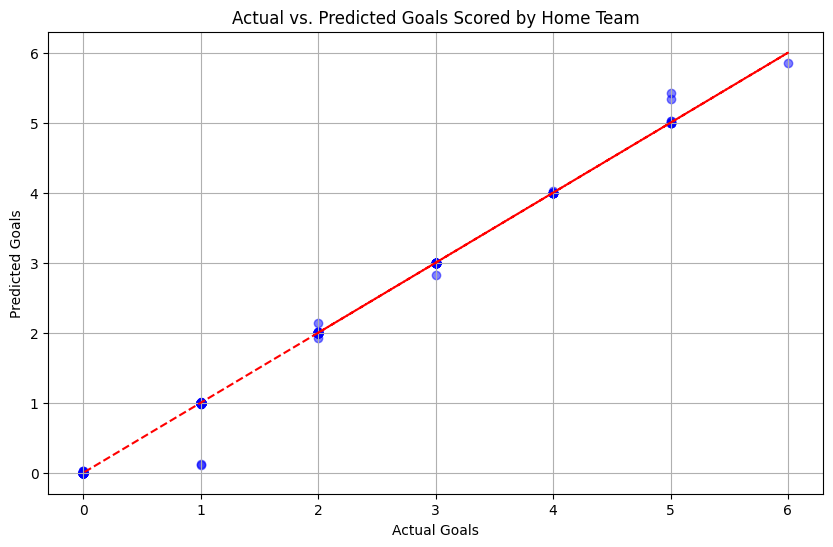

In [34]:
# Plotting actual vs. predicted goals
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'], color='blue', alpha=0.5)
plt.plot(results['Actual'], results['Actual'], color='red', linestyle='--')
plt.title('Actual vs. Predicted Goals Scored by Home Team')
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.grid(True)
plt.show()